6.24306
10.1457


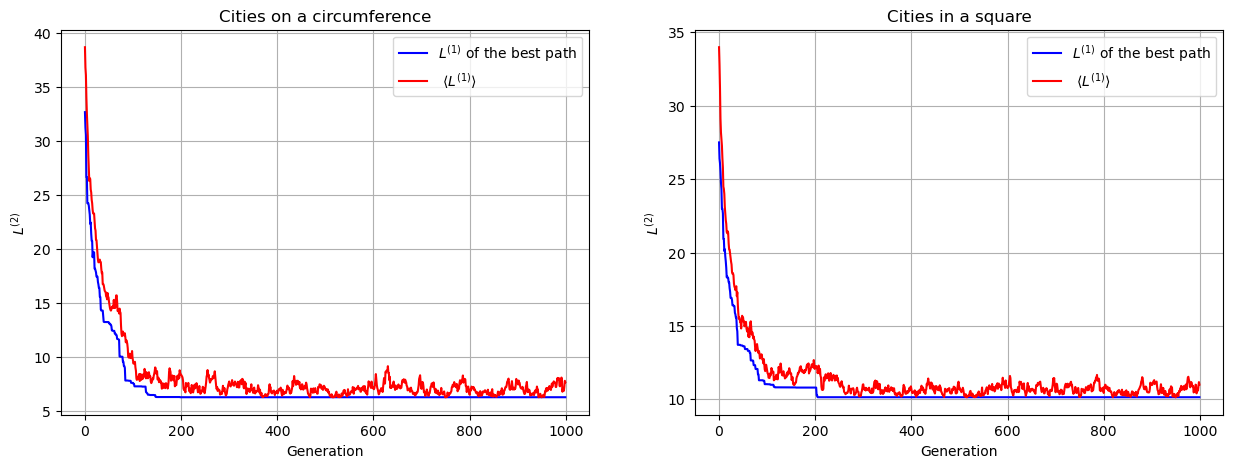

In [1]:
import matplotlib.pyplot as plt
import numpy as np

gen_c, L1_c, L1_c_m = np.loadtxt("./out circle test/results.dat", unpack=True, usecols=(0,1,2))
gen_s, L1_s, L1_s_m = np.loadtxt("./out square test/results.dat", unpack=True, usecols=(0,1,2))

print(L1_c[-1])
print(L1_s[-1])

fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharex=True)

axs[0].plot(gen_c, L1_c, label=r"$L^{(1)}$ of the best path", color='blue')
axs[0].plot(gen_c, L1_c_m, label=r" $\langle L^{(1)}\rangle$", color='red')
axs[0].set_title("Cities on a circumference")
axs[0].set_xlabel('Generation')
axs[0].set_ylabel(r"$L^{(2)}$")
axs[0].grid(True)
axs[0].legend()

axs[1].plot(gen_s, L1_s, label=r"$L^{(1)}$ of the best path", color='blue')
axs[1].plot(gen_s, L1_s_m, label=r" $\langle L^{(1)}\rangle$", color='red')
axs[1].set_title("Cities in a square")
axs[1].set_xlabel('Generation')
axs[1].set_ylabel(r"$L^{(2)}$")
axs[1].grid(True)
axs[1].legend()

plt.show()

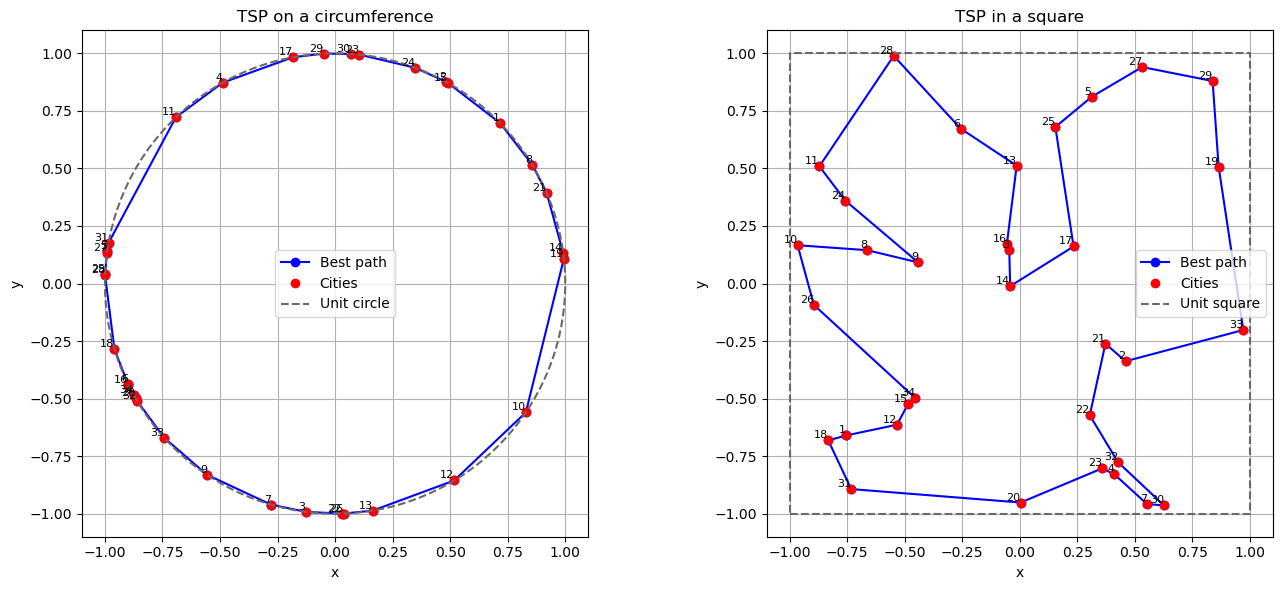

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def load_and_plot(ax, cities_file, route_file, title):
    name_cities, x, y = np.loadtxt(cities_file, unpack=True, usecols=(0,1,2), dtype=str)
    x = x.astype(float)
    y = y.astype(float)

    best_route = np.loadtxt(route_file, dtype=str)
    n_cities = len(best_route)
    best_route_coord = np.zeros((2, n_cities + 1))  

    for i in range(n_cities):
        city_name = best_route[i]
        index = np.where(name_cities == city_name)[0][0]
        best_route_coord[0, i] = x[index]
        best_route_coord[1, i] = y[index]

    # Chiudi il percorso collegando l'ultimo punto al primo
    best_route_coord[:, -1] = best_route_coord[:, 0]

    ax.plot(best_route_coord[0], best_route_coord[1], 'o-', label='Best path', color='blue')
    ax.plot(x, y, 'o', label='Cities', color='red')

    for i in range(len(name_cities)):
        ax.text(x[i], y[i], name_cities[i], fontsize=8, ha='right', va='bottom')

    if "circle" in cities_file:
        theta = np.linspace(0, 2*np.pi, 300)
        ax.plot(np.cos(theta), np.sin(theta), color='dimgray', linestyle='--', label='Unit circle')
    elif "square" in cities_file:
        square_x = [-1, 1, 1, -1, -1]
        square_y = [-1, -1, 1, 1, -1]
        ax.plot(square_x, square_y, color='dimgray', linestyle='--', label='Unit square')

    ax.set_aspect('equal')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

load_and_plot(ax1,"./out circle test/cities.dat","./out circle test/best_route.dat","TSP on a circumference")
load_and_plot(ax2,"./out square test/cities.dat","./out square test/best_route.dat","TSP in a square")

plt.tight_layout()
plt.show()